In [1]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv(path_to_csv + "/SONY.csv")
df1 = df.reset_index()['Close']

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [7]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [10]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 1s 26ms/step - loss: 0.0418 - val_loss: 0.0179
Epoch 2/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 3/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 5/100
14/14 [==============================] - 0s 13ms/step - loss: 9.3042e-04 - val_loss: 0.0026
Epoch 6/100
14/14 [==============================] - 0s 14ms/step - loss: 8.8776e-04 - val_loss: 0.0025
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 8.4595e-04 - val_loss: 0.0027
Epoch 8/100
14/14 [==============================] - 0s 15ms/step - loss: 8.4350e-04 - val_loss: 0.0023
Epoch 9/100
14/14 [==============================] - 0s 15ms/step - loss: 8.6240e-04 - val_loss: 0.0029
Epoch 10/100
14/14 [==============================] - 0s 15ms/step - loss: 8.118

In [12]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 7ms/step


In [13]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))
yval = scaler.inverse_transform(yval.reshape(-1, 1))

In [14]:
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 92.46119823474585
Testing RMSE: 84.17470186010712


In [15]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input_shape = x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, len(temp_input), 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


[0.6532129]
[0.66760075]
[0.67944694]
[0.68770343]
[0.6952867]
[0.69889927]
[0.7054754]
[0.7080756]
[0.7086617]
[0.71235675]
[0.7096996]
[0.708319]
[0.7028343]
[0.70169175]
[0.69083863]
[0.69072163]
[0.68281615]
[0.68806016]
[0.69669837]
[0.7078692]
[0.7157648]
21 day input [0.55556846 0.55556846 0.55002312 0.54655729 0.53592884 0.52576252
 0.49711184 0.47608596 0.46730598 0.46961648 0.46996305 0.47735675
 0.48001391 0.48059149 0.4772412  0.50496766 0.51409429 0.52252778
 0.53176988 0.51444086 0.49364608 0.50288818 0.5015019  0.4818623
 0.51247691 0.51397874 0.53592884 0.54690395 0.52460726 0.53419593
 0.52564697 0.51536508 0.5058919  0.52957493 0.54621073 0.56169137
 0.56954719 0.56585033 0.55013869 0.53304067 0.53696863 0.54158973
 0.54771262 0.55984289 0.56411742 0.56746771 0.56931609 0.56538821
 0.57012477 0.57786513 0.57220426 0.56296216 0.59819779 0.6129852
 0.55036969 0.57948249 0.56989376 0.58664511 0.58502774 0.59877546
 0.58237066 0.59923758 0.5938078  0.59126619 0.60824865 0

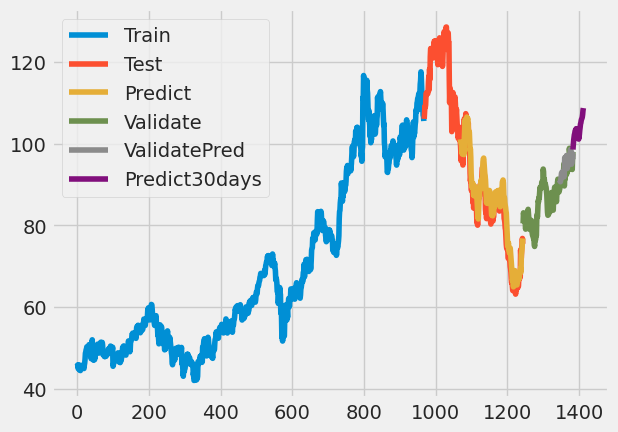

In [19]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(y_pred_val))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Test Output','Validate','ValidatePred','Predict30days'])
plt.show()